In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime, timedelta

def kelvin_to_celsius(kelvin_temp):
    return kelvin_temp - 273.15

def get_data_json(url, platformId, parameterId, startdate):
    params = {
        "platformId": platformId,
        "parameterId": parameterId,
        "startDate": startdate
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to fetch data. Status code:", response.status_code)
        return None

def _plot_series(df, ax):
    sns.lineplot(x='Timestamp', y='Value (Celsius)', data=df, ax=ax, label='Temperature', color='blue')
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Value (Celsius)")
    ax.set_title("Water Temperature vs Timestamp")
    plt.xticks(rotation=45)
    plt.tight_layout()

def update_data_and_plot(df, ax,URL_address, platformId,parameterId,startDate):
    #global startDate
    new_data = get_data_json(URL_address, platformId, parameterId, startDate)
    if new_data:
        timestamps = [observation["timestamp"] for observation in new_data[0]["parameters"][0]["observations"]]
        values_kelvin = [observation["value"] for observation in new_data[0]["parameters"][0]["observations"]]
        values_celsius = [kelvin_to_celsius(value) for value in values_kelvin]
        timestamps = pd.to_datetime(timestamps)
        new_df = pd.DataFrame({"Timestamp": timestamps, "Value (Celsius)": values_celsius})
        combined_df = pd.concat([df, new_df]).drop_duplicates().reset_index(drop=True)

        # Clear the axis for the new plot
        ax.clear()
        _plot_series(combined_df, ax)
        plt.draw()

        # Update the start date for the next API call to the latest timestamp
        if not combined_df.empty:
            startDate = combined_df["Timestamp"].max().strftime('%Y-%m-%d %H:%M:%S')

        return combined_df
    else:
        return df

In [ ]:

  """ plt.ion()  # Turn on interactive mode for live updates
   fig, ax = plt.subplots(figsize=(10, 5.2))
   df = pd.DataFrame()

   # Update the data and plot for the first time
   df = update_data_and_plot(df, ax, URL_address,platformId, parameterId,startDate)

   try:
      while True:
        time.sleep(600)  # 30 minutes
        df = update_data_and_plot(df, ax,URL_address,platformId,parameterId,startDate)
   except KeyboardInterrupt:
        print("Data fetching and plotting has been manually stopped.")

   plt.ioff()  # Turn off interactive mode
   plt.show()  # Show the final plot"""


Data fetching and plotting has been manually stopped.


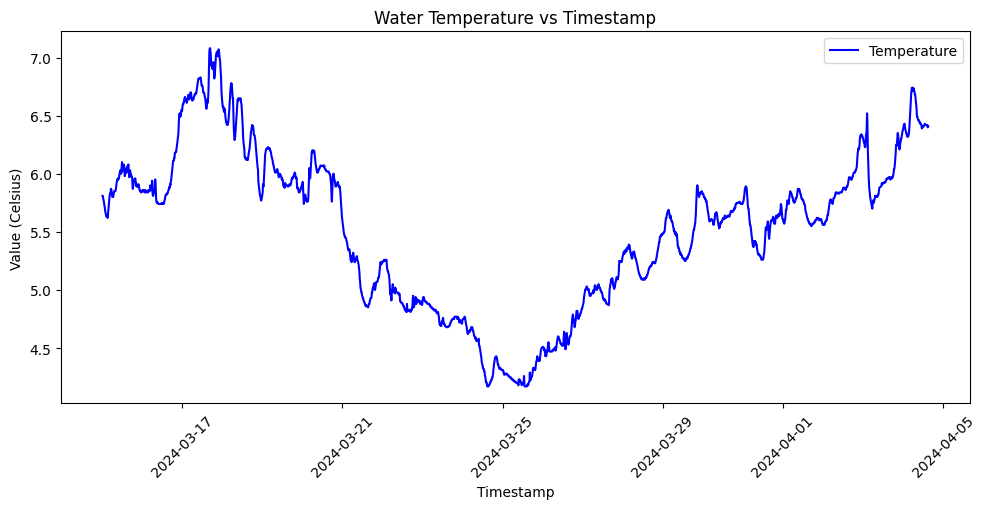

In [ ]:
URL_address="https://seagull-api.glos.org/api/v1/obs"
startDate = "2024-03-15"

plt.ion()  # Turn on interactive mode for live updates
fig, ax = plt.subplots(figsize=(10, 5.2))
df = pd.DataFrame()

   # Update the data and plot for the first time
df = update_data_and_plot(df, ax, URL_address,18,54,startDate)

try:
      while True:
        time.sleep(600)  # 30 minutes
        df = update_data_and_plot(df, ax,URL_address,18,54,startDate)
except KeyboardInterrupt:
        print("Data fetching and plotting has been manually stopped.")

plt.ioff()  # Turn off interactive mode
plt.show()  # Show the final plot

In [ ]:
plt.ion()  # Turn on interactive mode for live updates
fig, ax = plt.subplots(figsize=(10, 5.2))
df = pd.DataFrame()

   # Update the data and plot for the first time
df = update_data_and_plot(df, ax, URL_address,15,32,startDate)

try:
      while True:
        time.sleep(600)  # 30 minutes
        df = update_data_and_plot(df, ax,URL_address,18,54,startDate)
except KeyboardInterrupt:
        print("Data fetching and plotting has been manually stopped.")

plt.ioff()  # Turn off interactive mode
plt.show()  # Show the final plot

Data fetching and plotting has been manually stopped.


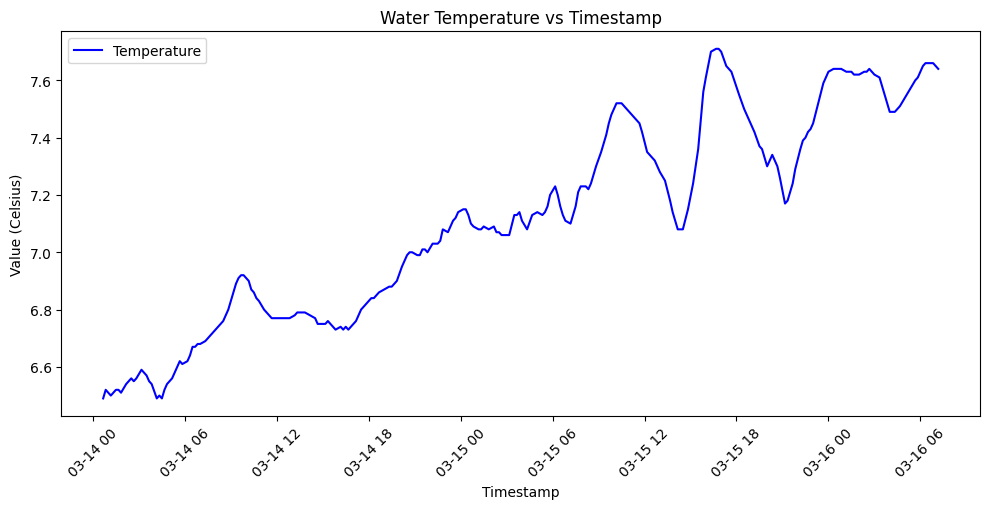

In [ ]:

plt.ion()  # Turn on interactive mode for live updates
fig, ax = plt.subplots(figsize=(10, 5.2))
df = pd.DataFrame()

   # Update the data and plot for the first time
df = update_data_and_plot(df, ax, URL_address,15,32,startDate)

try:
      while True:
        time.sleep(600)  # 30 minutes
        df = update_data_and_plot(df, ax,URL_address,15,32,startDate)
except KeyboardInterrupt:
        print("Data fetching and plotting has been manually stopped.")

plt.ioff()  # Turn off interactive mode
plt.show()  # Show the final plot

[{'obs_dataset_id': 15, 'parameters': [{'observations': [{'latitude': 41.67196, 'longitude': -83.2903, 'timestamp': '2024-03-12T00:20:00+00:00', 'value': 278.87}, {'latitude': 41.67196, 'longitude': -83.2903, 'timestamp': '2024-03-12T00:10:00+00:00', 'value': 278.89}, {'latitude': 41.67196, 'longitude': -83.2903, 'timestamp': '2024-03-11T23:50:00+00:00', 'value': 278.88}, {'latitude': 41.67196, 'longitude': -83.2903, 'timestamp': '2024-03-11T23:40:00+00:00', 'value': 278.86}, {'latitude': 41.67196, 'longitude': -83.2903, 'timestamp': '2024-03-11T23:30:00+00:00', 'value': 278.86}, {'latitude': 41.67196, 'longitude': -83.2903, 'timestamp': '2024-03-11T23:20:00+00:00', 'value': 278.86}, {'latitude': 41.67196, 'longitude': -83.2903, 'timestamp': '2024-03-11T23:10:00+00:00', 'value': 278.86}, {'latitude': 41.67196, 'longitude': -83.2903, 'timestamp': '2024-03-11T22:50:00+00:00', 'value': 278.86}, {'latitude': 41.67196, 'longitude': -83.2903, 'timestamp': '2024-03-11T22:40:00+00:00', 'value'